# D-tree regressor

loading modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
%matplotlib inline

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# going to predict milage per gallon (mpg)

In [2]:
df = pd.read_csv('./auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# preprocessing

In [3]:
df.info()
df.drop(columns='car name',axis=1,inplace=True)
df['horsepower'].nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


94

In [4]:
df.isnull().sum()  

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [5]:
df['horsepower'].value_counts()['?']

6

# Imputing missing values

In [6]:
np.where(df['horsepower']=='?')
df['horsepower'] = df['horsepower'].replace('?', np.nan)
median = df['horsepower'].median()
df['horsepower'] = df['horsepower'].replace(np.nan,median)

In [7]:
X = df.drop('mpg',axis=1)
y = df['mpg']

# train test split

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

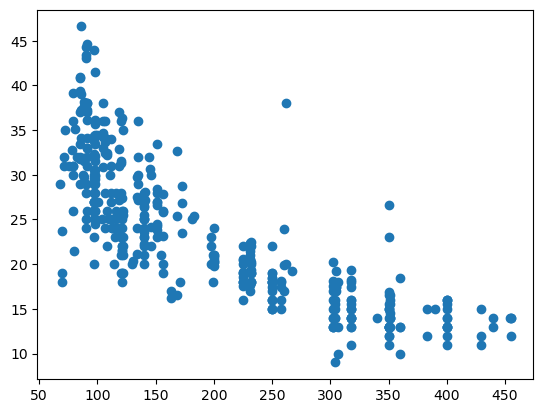

In [9]:
plt.figure()
plt.scatter(df['displacement'],df['mpg'])

# D-tree regression model

In [24]:
dtr = DecisionTreeRegressor(max_depth=8,random_state=3,min_samples_leaf=0.13)

In [25]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [26]:
from sklearn.metrics import mean_squared_error # metrics of regression problem

In [27]:
y_ = dtr.predict(X_test)

In [28]:
y__ = dtr.predict(X_train)

In [29]:
print(f'mean sq err for training set = {mean_squared_error(y_train,y__)}')
print(f'mean sq err for testing set = {mean_squared_error(y_test,y_)}')

mean sq err for training set = 13.130633192265037
mean sq err for testing set = 17.36676093085861


# Root mean squared error metric

In [30]:
MSE = mean_squared_error(y_test,y_)
print(f'RMSE for test set = {MSE**(1/2)}')

RMSE for test set = 4.167344589886779
